In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
sns.set_context('poster')
import glob
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance
import os

%load_ext autoreload
%autoreload 2

In [2]:
path_prefix = '../'
import sys
sys.path.append(path_prefix)
from util import resolution_util as ru
from util import plot_util as pu
from util import ml_util as mu
import atlas_mpl_style as ampl
ampl.set_color_cycle('Oceanic',10)
# plt.style.use('paper')

2021-08-31 09:36:01.975026: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2


In [3]:
data_dir = '../../from_pier/ml4pions_graph/results/Block_20210713eve_concatFalse/'
pion = '$\pi^{\pm}$'

Loading form ../../from_pier/ml4pions_graph/results/Block_20210713eve_concatFalse/


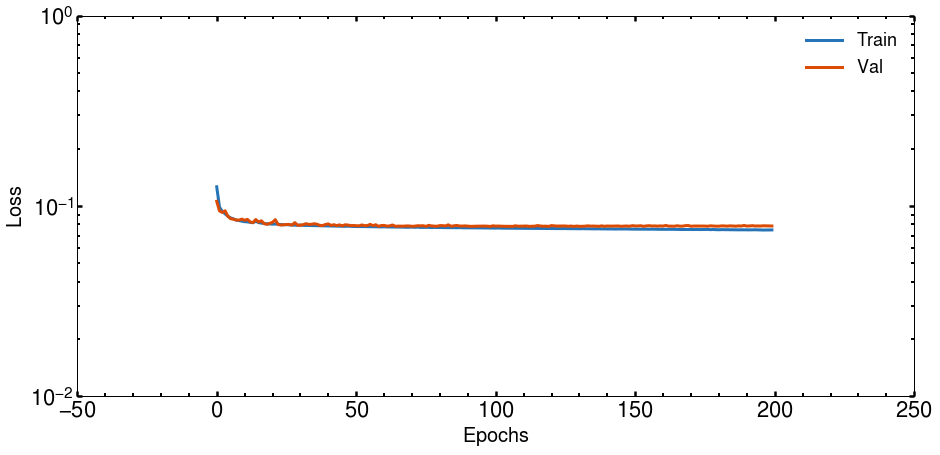

In [4]:
pion_list = ['pion']
sym_list = ['+-',]
concat_type = ['False']
model_name = ['ConcatFalse']
line = ['-', '--', ':']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

plt.figure(figsize=(15,7))
# print('\nPlotting losses fro {}'.format(data_dir))
hist_files = np.sort(glob.glob(data_dir + 'losses.npz'))
print('Loading form {}'.format(data_dir))


hist = np.load(hist_files[0])
plt.semilogy(hist['training'].mean(axis=1), color=blues[5, :3], 
             label=r'$Train$', linestyle=line[0])
plt.semilogy(hist['validation'].mean(axis=1), color=oranges[5, :3], 
             label=r'$Val$', linestyle=line[0])

plt.ylabel(r'$Loss$')
plt.xlabel(r'$Epochs$')
# plt.ylim([5e-2, 5e-1])
# sns.despine()
plt.legend()
plt.savefig(data_dir+'/training_mse.png', bbox_inches='tight', dpi=300)
plt.show()


In [5]:
pred_file = data_dir+'/predictions.npz'
predictions = np.load(pred_file)
targets_regress = predictions['targets']
outputs_regress = predictions['outputs']

In [6]:
def make_response_plot(y_true, y_pred, pion_label, f_name=''):
    y_ratio = y_pred/y_true

    p_r = pearsonr(y_true,y_pred)[0]
    s_r = spearmanr(y_true,y_pred)[0]
    mse = mean_squared_error(y_true,y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print("r2:{:.3f}".format(r2))
    print("PearsonR:{:.3f}, SpearmanR:{:.3f}, MSE:{:.3f}, MAE:{:.3f}".
          format(p_r, s_r, mse, mae))
    xcenter, medRegCNN = ru.responsePlot(y_true, y_ratio,
                                         figfile = f_name,
                                         statistic = 'median',
                                         atlas_x = 0.55, atlas_y = 0.95, simulation = True,
                                         textlist = [{'x': 0.55, 'y': 0.85, 'text': pion_label}])
    return xcenter, medRegCNN


Plotting $\pi^{\pm}$
r2:0.997
PearsonR:0.998, SpearmanR:0.993, MSE:183.584, MAE:3.182


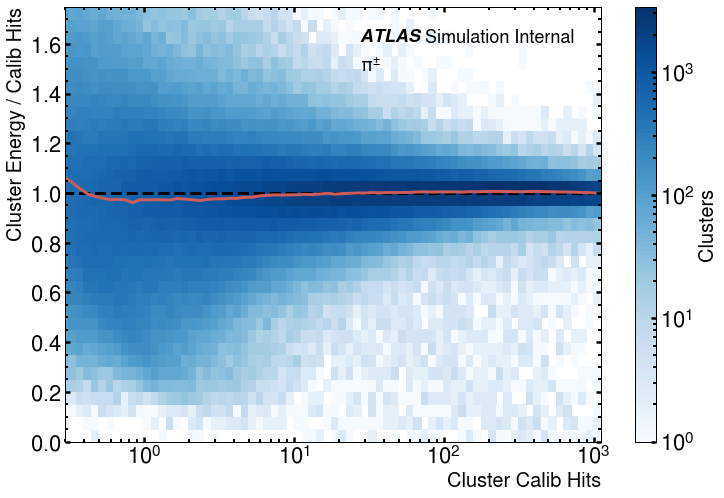

In [7]:
c_map = sns.color_palette("Blues")

pion_list = ['$\pi^{all}$', '$\pi^{0}$', '$\pi^{\pm}$']
sym_list = ['', '0', '+-']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

response_median = []

print('\nPlotting {}'.format(pion))
y_true = targets_regress
y_pred = outputs_regress
xcenter, medRegCNN = make_response_plot(y_true, y_pred, pion)
response_median.append(medRegCNN)

np.savez(data_dir+'/response_medians.npz', response_median=response_median, xcenter=xcenter)

In [8]:
def make_hist_plot(y_true, y_pred, pion_label, f_name=None):
    print('Wasserstein distance: {:.3f}'.format(wasserstein_distance(y_true, y_pred)))
    fig = plt.figure(figsize=(20,10))
    plt.hist(y_true, bins=np.linspace(-1., 4., 100), alpha=.5, label=r'$True$')
    plt.hist(y_pred, bins=np.linspace(-1., 4., 100), alpha=.5, label=r'$Predicted$')
    plt.legend(loc='upper right')
    plt.xlabel(r'$Log\ values$')
    plt.ylabel(r'$Counts$')
    plt.xlim([-1.5, 4.])

    atlas_x = 0.55 
    atlas_y = 0.95 
    simulation = True
    textlist = [{'x': 0.55, 'y': 0.88, 'text': pion_label},
                {'x': 0.55, 'y': 0.83, 'text': 'Wasserstein distance: {:.4f}'.format(wasserstein_distance(y_true, y_pred))}]

    pu.drawLabels(fig, atlas_x, atlas_y, simulation, textlist)
    # sns.despine()
    if f_name:
        plt.savefig(f_name)
    plt.show()


Plotting $\pi^{\pm}$
Wasserstein distance: 0.015


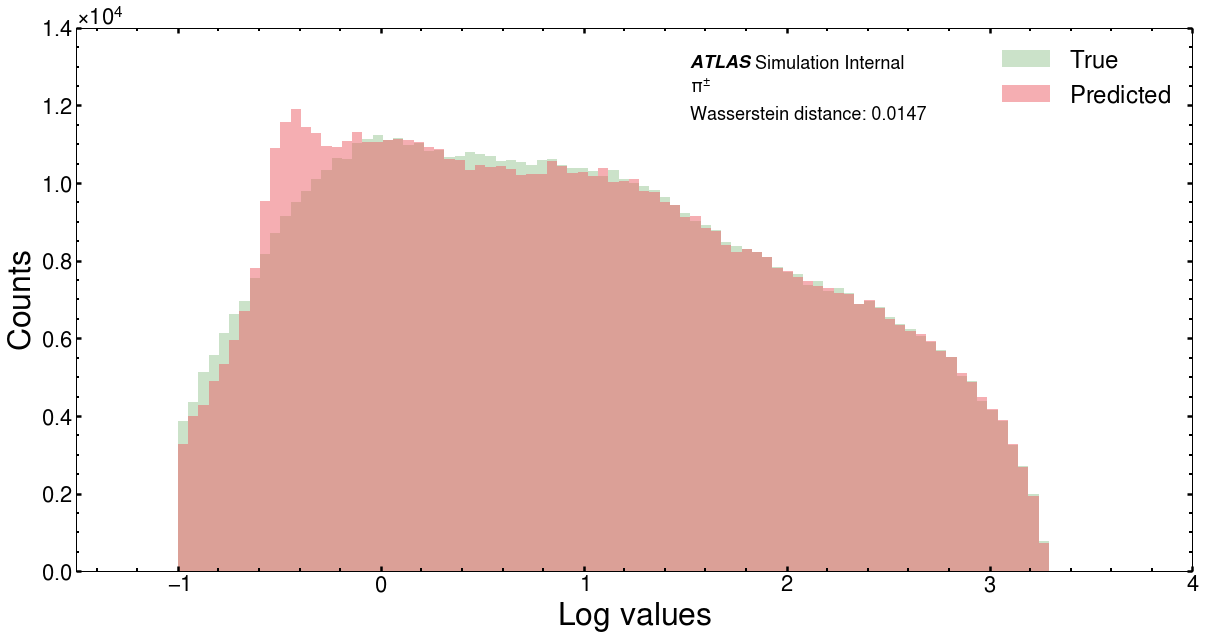

In [9]:
import atlas_mpl_style as ampl
ampl.use_atlas_style()

# set plotsytle choices here
params = {'legend.fontsize': 24,
          'axes.labelsize': 32}
plt.rcParams.update(params)

ampl.set_color_cycle('Oceanic',10)

c_map = sns.color_palette("Blues")

pion_list = ['$\pi^{all}$', '$\pi^{0}$', '$\pi^{\pm}$']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

print('\nPlotting {}'.format(pion))
y_true = np.log10(targets_regress)
y_pred = np.log10(outputs_regress)
make_hist_plot(y_true, y_pred, pion)


Plotting $\pi^{\pm}$


<Figure size 799.992x599.976 with 0 Axes>

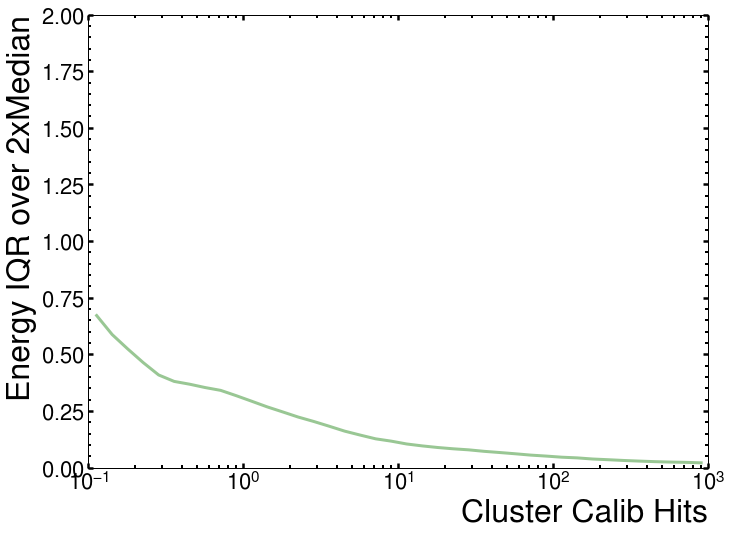

In [10]:
iqr = []
print('\nPlotting {}'.format(pion))
y_true = targets_regress
y_pred = outputs_regress
y_ratio = y_pred/y_true
xcenter, iqr_curr= ru.resolutionPlot(y_true, y_ratio, statistic='iqrOverMed')
iqr.append(iqr_curr)

np.savez(data_dir+'/iqr.npz', response_median=iqr, xcenter=xcenter)